# Python Lanchester's laws simulation

The Lanchester equations are a set of mathematical formulas used to model and analyze the outcome of military engagements between two opposing forces. Developed by Frederick W. Lanchester, a British engineer, during World War I, these equations provide a way to predict the attrition and effectiveness of two battling forces based on their size, firepower, and attrition rates.

The Lanchester equations come in two primary forms: linear and square. The linear form is also known as Lanchester's Law of Primitive Warfare, while the square form is known as Lanchester's Law of Modern Warfare. Here we will only consider the Linear Law (Primitive Warfare). In this model, the effectiveness of each force is assumed to be proportional to its size. It is mostly applicable to ancient or primitive warfare, where engagements were hand-to-hand combats or involved simple projectile weapons like arrows or spears. The linear equations are as follows:

$\frac{dA} {dt} = - \beta B $

$\frac{dB} {dt}  = - \alpha A $

The given equations are first-order linear differential equations and can be solved using the method of separation of variables. The equations are of the form:

dx/dt = -ax

Rearrange to isolate terms involving x and t on separate sides of the equation:

dx/x = -a dt

Then integrate both sides with respect to their individual variables:

∫ dx/x = ∫ -a dt

which gives:

ln|x| = -at + C

Solving for x by exponentiating both sides yields:

|x| = e^(-at + C)

Which simplifies to:

x(t) = C e^(-at)

where C is an arbitrary constant that would be determined by an initial condition. The absolute value bars are dropped because C can take any real value, including negative values.

(c) 2022 Marcin "szczyglis" Szczygliński

GitHub page: https://github.com/szczyglis-dev/python-lanchester

Email: szczyglis@protonmail.com

Version: 1.0.0

This file is licensed under the MIT License.

License text available at https://opensource.org/licenses/MIT



\# R = red force numbers R\[t\] is the Red force at time = t

\# B = blue force numbers  B\[t\] os the Blue force at time = t

\# b\_s = offensive power of the Blue force

\# r\_s = offensive power of the Red force

\# t = elapsed time



In [6]:
#Here we import Python libraries
import numpy as np                   #import math library
import matplotlib.pyplot as plt      #import plot library
__version__="1.0.0"

When explaining the limitations of using **difference equations** to program the solution of **Lanchester's equations** (or any differential equation) in Python, it's important to balance both the conceptual understanding of the **limitations** and why **numerical methods** based on difference equations are still **necessary** for solving such problems in programming.

### **Lanchester's Equations Overview**

Lanchester’s equations model combat scenarios by describing how two opposing forces inflict casualties on each other over time. These equations are typically represented as **ordinary differential equations** (ODEs), such as:

- **Lanchester’s Linear Law**: $\frac{dA}{dt} = -kB , \frac{dB}{dt} = -lA $
- **Lanchester’s Square Law**: $\frac{dA}{dt} = -kB , \frac{dB}{dt} = -lA $

where A(t) and B(t) are the force sizes of two opposing sides, and  k  and l are effectiveness coefficients.

### **Numerical Solutions: Difference Equations vs. Differential Equations**

#### **Why Use Difference Equations (Discretization)?**

When programming the solution to a differential equation, **numerical methods** are needed because most differential equations **do not have closed\-form analytical solutions**. In Python (or any programming environment), the continuous $x^2$nature of a differential equation must be **discretized** to make it computationally solvable. This leads to the use of **difference equations** (also called discrete approximations) to estimate how the system evolves over small increments of time.

1. **Differential Equations**:
   - $\frac{dA}{dt} = -kB $
   - This equation gives the **rate of change** of  A  with respect to time but doesn’t directly provide a step-by-step solution for  A  at each moment in time.

2. **Difference Equations**:
   - A **difference equation** is a discrete approximation of the continuous differential equation:
     - $A(t + \Delta t) = A(t) + \left( \frac{dA}{dt} \right) \Delta t $
     - $B(t + \Delta t) = B(t) + \left( \frac{dB}{dt} \right) \Delta t $
   - In programming, you use a small time step $\Delta t $ to update the values of  A  and  B  incrementally, which is necessary because computers can only handle **discrete steps**, not the continuous time of the real-world differential equation.

### **Limitations of Difference Equations (Discretization)**

#### **1. Accuracy is Dependent on the Step Size (\( \Delta t \))**

The most important limitation of using difference equations is that the **accuracy** of the solution depends on the size of the time step \( \Delta t \) chosen. A larger \( \Delta t \) may lead to faster computation, but it introduces more approximation error, as you are not following the curve of the differential equation closely enough.

- **Small Step Size (High Accuracy)**: Using a small $\Delta t $ means you are closely approximating the actual continuous system, but at the cost of **increased computation time**.
- **Large Step Size (Low Accuracy)**: A large $ \Delta t $ reduces computation time but increases the error, as the solution jumps over parts of the curve and misses important details in the system's behavior.

#### **2. Stability Issues**

Depending on the problem and the chosen numerical method (e.g., **Euler’s method**, **Runge-Kutta**, etc.), some difference equations can lead to **unstable solutions**. With an unstable method, small errors at each step can accumulate and lead to wildly inaccurate solutions.

- For example, **Euler’s method** is simple but not always stable for certain systems unless \( \Delta t \) is very small. More advanced methods like **Runge-Kutta** provide better stability at larger step sizes.

#### **3. Numerical Errors and Rounding**

Every numerical method introduces **rounding errors** due to the finite precision of computers. These errors might be negligible in short simulations, but over time and with larger step sizes, they can accumulate and lead to **incorrect results**.

- This can be particularly problematic when dealing with **long-term predictions** or scenarios where small changes in early values significantly affect later behavior (sensitive dependence on initial conditions).

### **Why Difference Equations are Necessary**

Despite these limitations, difference equations are **necessary** for solving differential equations in Python and other programming environments because:

1. **Most Differential Equations Cannot Be Solved Analytically**:
   - For many real-world problems, including Lanchester’s equations in complex scenarios, there are **no closed-form solutions**. Numerical methods via difference equations are often the only way to approximate the solution.

2. **Computers Work Discretely**:
   - Computers inherently work with discrete data and cannot process continuous functions directly. The only way to approximate the continuous evolution of a system described by a differential equation is to break it down into discrete time steps (difference equations) and solve it step-by-step.

3. **Control and Flexibility**:
   - Using difference equations in numerical methods allows **control over accuracy** by adjusting the step size \( \Delta t \) and choosing appropriate methods (e.g., Euler’s method, Runge-Kutta). You can trade off computation time versus accuracy based on the needs of the problem.

4. **Modeling Complex Systems**:
   - Numerical solutions via difference equations allow you to model complex, nonlinear, or time-dependent systems where analytical solutions don’t exist or would be too difficult to derive.

### **Explanation with Python Example (Euler’s Method)**

Here’s a Python implementation using **Euler’s Method** to solve Lanchester's equations using difference equations:

```python
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 0.11  # Effectiveness of force B
l = 0.1  # Effectiveness of force A
A0 = 100  # Initial size of force A
B0 = 100  # Initial size of force B
dt = 0.01  # Time step (smaller step for better accuracy)
time_steps = 500  # Number of steps

# Arrays to store results
A = [A0]
B = [B0]
time = [0]

# Euler's method for numerical integration
for t in range(1, time_steps):
    A_new = A[-1] - k * B[-1] * dt
    B_new = B[-1] - l * A[-1] * dt
    A.append(A_new)
    B.append(B_new)
    time.append(t * dt)

# Plotting results
plt.plot(time, A, label="Force A")
plt.plot(time, B, label="Force B")
plt.title("Lanchester's Combat Model using Euler's Method")
plt.xlabel("Time")
plt.ylabel("Force Size")
plt.legend()
plt.show()
```

### **Conclusion:**

- **Limitations**: Difference equations are approximations, and their accuracy depends on the time step size. Larger steps introduce errors, and some numerical methods may cause instability in the solution. Additionally, rounding errors can accumulate over time.
- **Necessity**: Despite these limitations, difference equations are essential for solving differential equations computationally. They enable the use of numerical methods to approximate solutions for problems where no analytical solutions exist, allowing for flexibility and the ability to model complex systems.

This trade-off between accuracy, computational cost, and feasibility is a cornerstone of numerical methods, and difference equations are the practical tool that makes solving such problems possible in programming environments like Python.



The differential equation for the linear case $\frac{dR}{dt}= - \beta \times B$ becomes a difference equation;
R(t)-R(t-1) = - $\beta \times B(t-1) \delta t $ or R(t) = R(t-1) - $\beta \times B(t-1) \delta t $

This means the Red force strength, R, at time t-1 is reduced by the 'efficiency factor' $\beta \times$ the Blue force strength B at time t-1. This same equation is used for the reduction in the Blue force.

R.append(Rnew) is a built-in python function that places the value Rnew at the current end of the list R.
for t in np.arange(0, T, dt): will loop through the indented statements using the value t that changes during each loop
the changes in t are described by the numPy function np.arange(0,T,dt). t will vary from 0 to T in steps of dt.
In this case T may be defined as 100 and dt as .t and t would then be, 0, .1 .2 and so on until it reached 100.
the loop would then exit to the next statement.

In the next cell we will implement another version of the linear law in python


In [3]:
#This is a function that computes the next values of the Red and Blue force strength
#and places them in the arrays R[] and B[].
def calc_linear(R, B, r_l, b_l, t):        #called from linear law
    Rnew = R[t] - b_l * B[t]       # compute the next value of the Red force strength
    #print("Rnew = ", Rnew, "R[t] = ", R[t])
    Bnew = B[t] - r_l * R[t]       # compute the next value of the Blue force strength
   # print("Bnew = ", Bnew, "B[t] = ", B[t])
    R.append(Rnew)             #put this new value of R into the list R
    B.append(Bnew)             #put this new value of B into the list B
   #print("calc t = ", t)
    return R, B

# linear law
def linear(R0, B0, r_l, b_l, T, dt):

    R = [R0,]      #initialize the list R
    B = [B0,]      #initialize the list B
    for t in np.arange(0, T, dt):
        R, B = calc_linear(R, B, r_l, b_l, t)  #call the function calc_linear to update the arrays
        if R[t] < 1 or B[t] < 1: break         # continue until one of the forces is eliminated
#    print("t = ", t, "R = ", R[-1], "B =", B[-1])  #print the final values
    return R, B

In [4]:
# Initial and base parameters:
R0 = 10000  # number of RED units
B0 = 10000  # number of BLUE units

T = 3000  # total number of steps in the simulation
dt = 1     # time interval

r_l = 0.001 # combat efficiency of RED units, each time step each Red kills .1% of Blue 
b_l = 0.0012 # combat efficiency of BLUE units, each time step each Blue kills .12% of Red

In [17]:
#Run the linear model.
b_l = 0.00099             # Here we can override the previously defined value of b_1
R, B = linear(R0, B0, r_l, b_l, T, dt) # this line calls the previously defined Linear Law model Python code.

Predicted result of the battle：

Winner: RED
Remaining RED units [ 998.55016099197 ]
Remaining BLUE units [ 8.288936018732233 ]


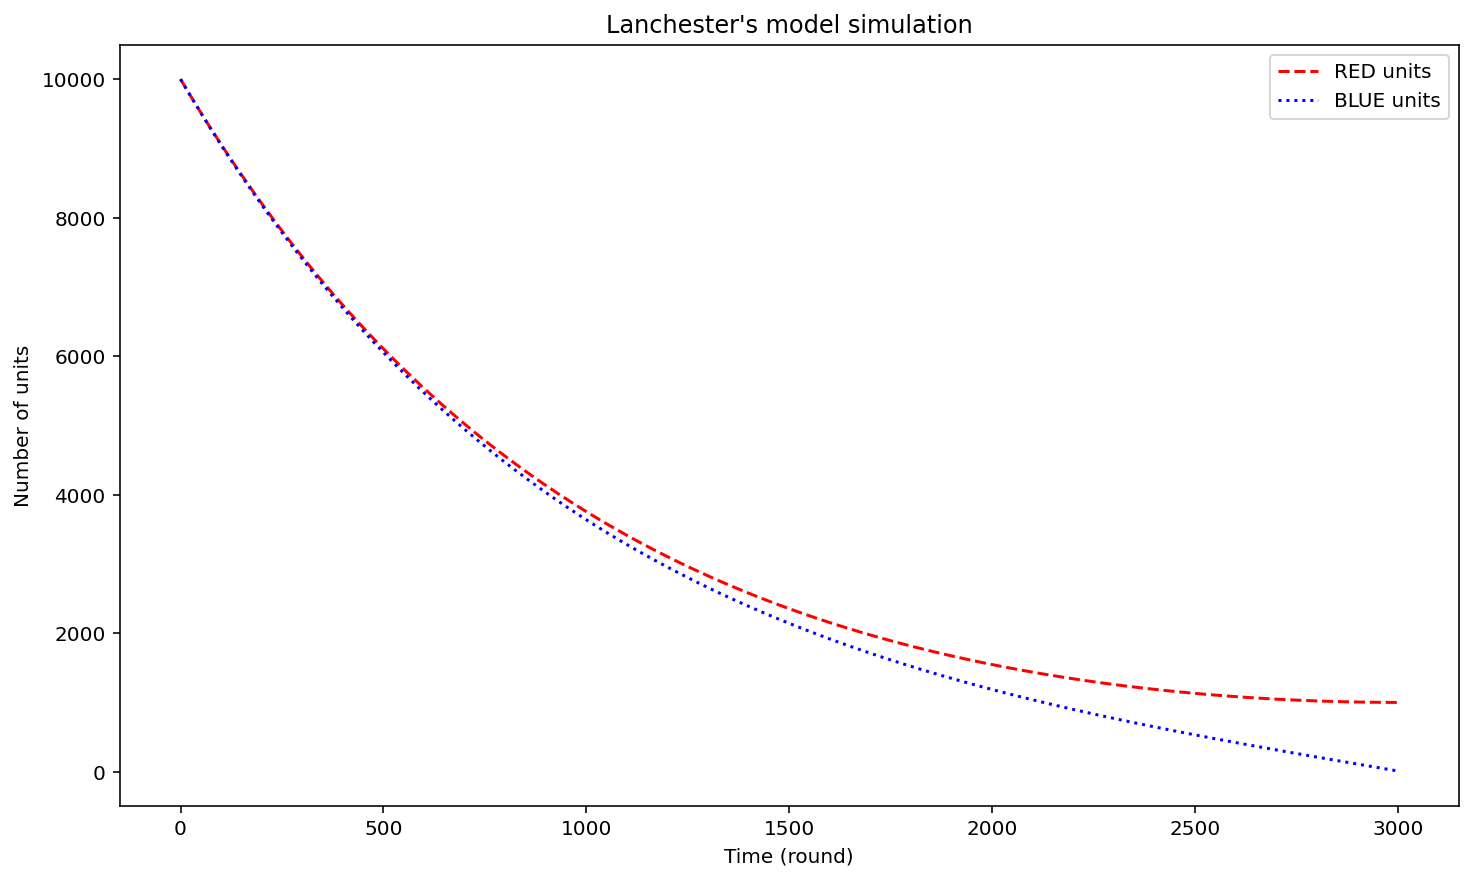

In [18]:
# display result
print("Predicted result of the battle：\n")
if R[-1] > B[-1]:
    print("Winner: RED")
else:
    print("Winner: BLUE")

# display remaining units info  
print("Remaining RED units [", R[-1], "]")
print("Remaining BLUE units [", B[-1], "]")

# display result on plot
t = np.arange(0, len(R) * dt, dt)
#plt.figure(1)
plt.plot(t, R, '--r', label='RED units')
plt.plot(t, B, ':b', label='BLUE units')
plt.xlabel("Time (round)")
plt.ylabel("Number of units")
plt.title("Lanchester's model simulation")
plt.legend()
plt.show()

In [9]:
print(R[0], R[1], B[0], B[1])

10000 9990.0 10000 9990.0


A number of variations of these equations have been produced and make for interesting reading and exercises. The purpose of this example is to introduce a simple model and subsequent simulation.

What happens if we run this a number of time with a random value of b\_1


In [10]:
import matplotlib.pyplot as plt   # import the plotting routines <https://matplotlib.org/>
import random                     # import the routine for generating random numbers <https://docs.python.org/3/library/random.html>
import numpy as np                # numpy is a Python library for scientific computing see <https://numpy.org>
from scipy.stats import gaussian_kde
import seaborn as sns             # another plot library 

r_l = 0.001 # combat efficiency of RED units, each time step each Red kills .1% of Blue 
b_l = 0.0012 # combat efficiency of BLUE units, each time step each Blue kills .12% of Red

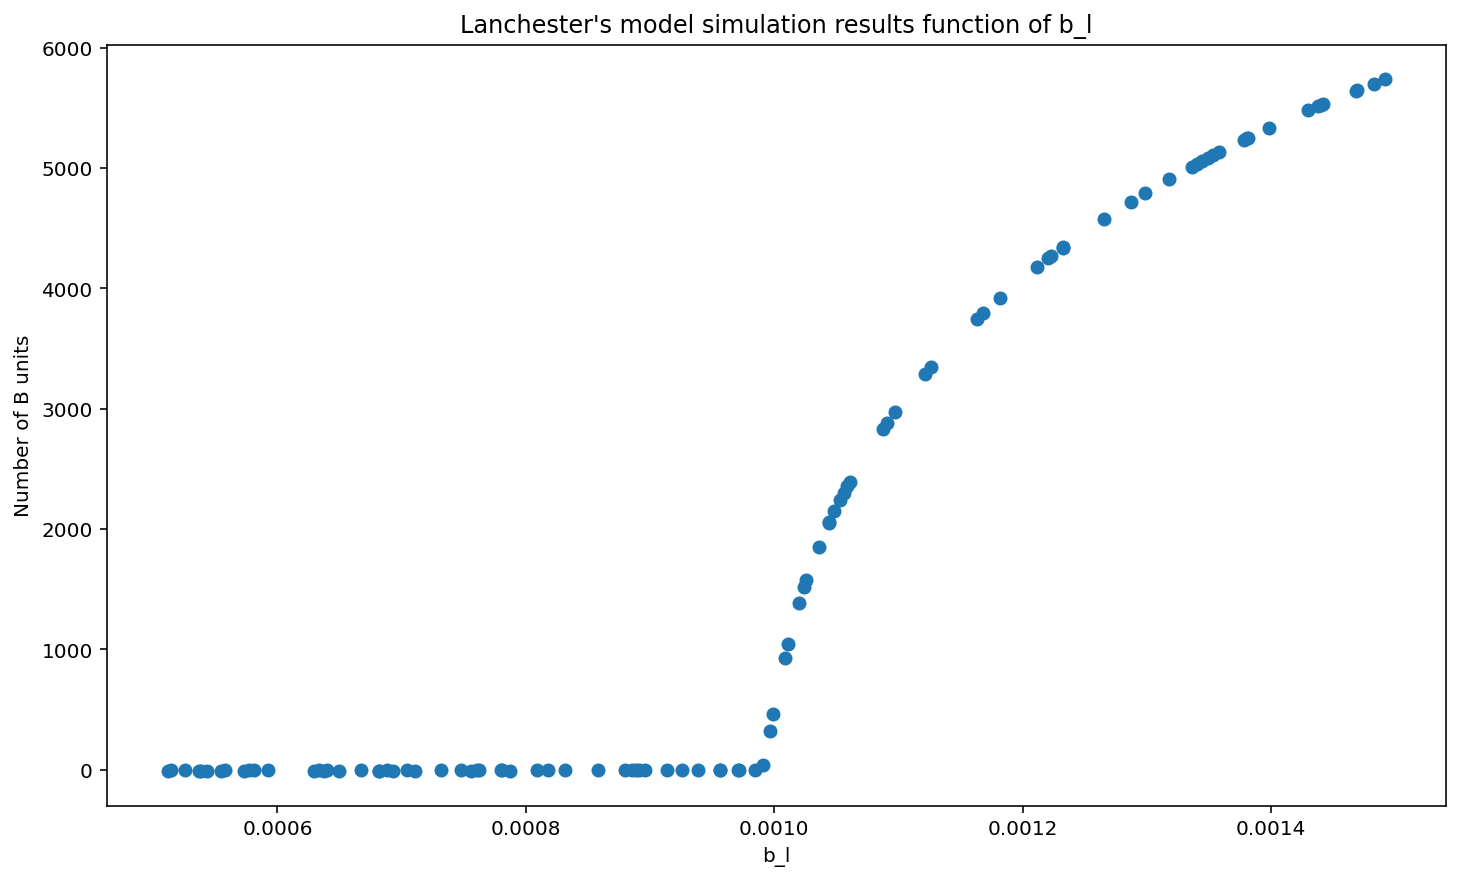

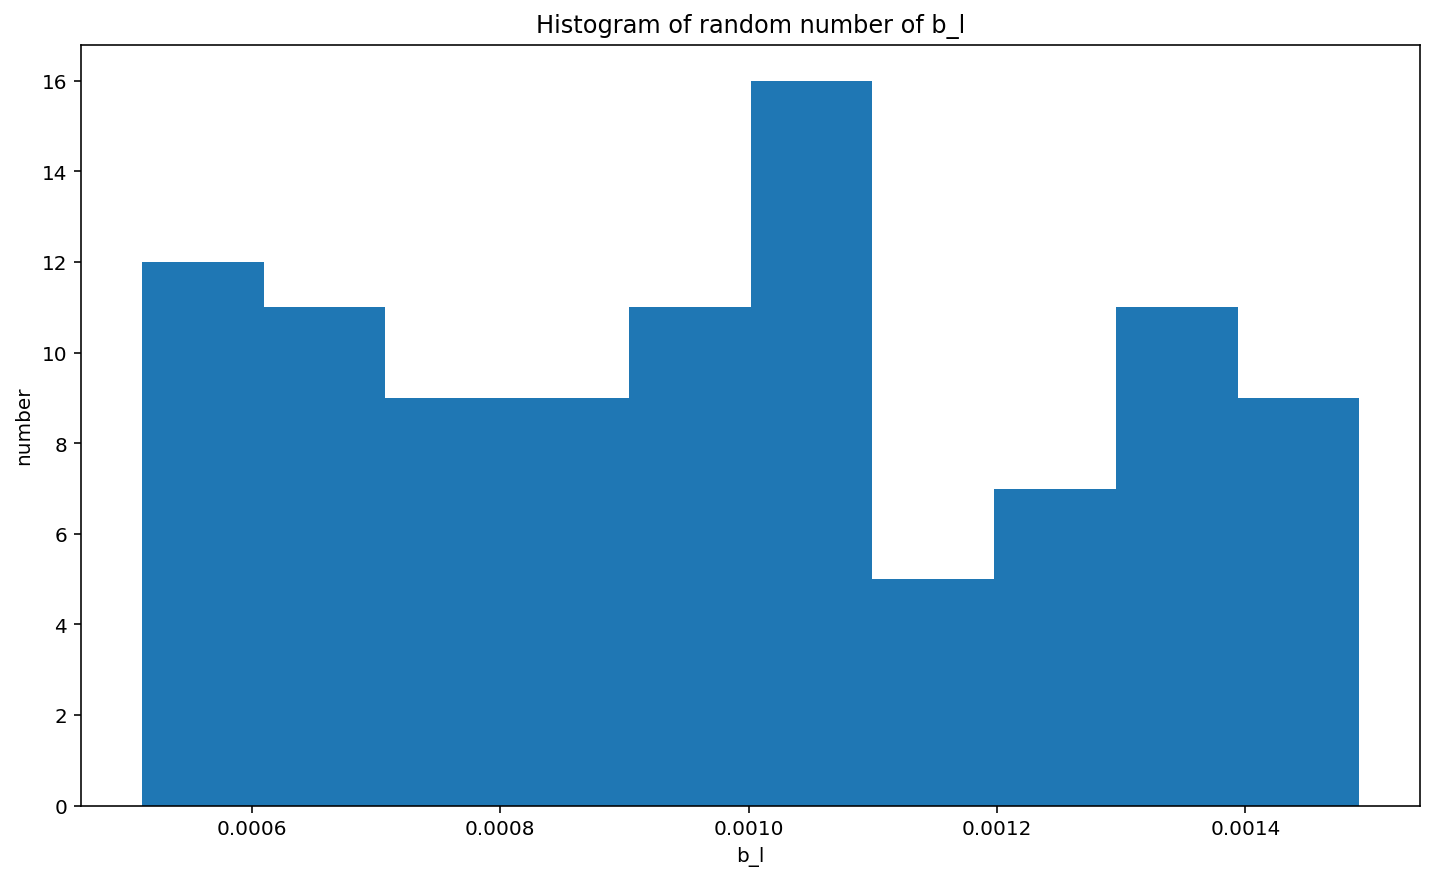

In [12]:
X1 = []   # create a list for b_l
Y1 = []   # create a list for the outcome for B


# run the simulation a number of times
for i in range (0, 100):
   b_l = random.random()/1000 + .0005  #create a random number between .0005 and .0015 to change b_l randomly
   R, B = linear(R0, B0, r_l, b_l, T, dt) # this line calls the previously defined Linear Law model Python code.
   X1.append(b_l)    # add the b_l number to its list
   Y1.append(B[-1])  # add the final number of B to its list
#   print(b_l)
plt.xlabel("b_l")
plt.ylabel("Number of B units")
plt.title("Lanchester's model simulation results function of b_l")
plt.scatter(X1,Y1)   #plot a scatter diagram of b_l and the resulting values of B
plt.show()
plt.xlabel("b_l")
plt.ylabel("number")
plt.title("Histogram of random number of b_l")
plt.hist(X1)          #plot a histogram of the values of b_l
plt.show() 

As is expected as b\_1 becomes greater than a\_1, \(.001\) the number of remaining B units increases.
